預處理

In [52]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

train_data = pd.read_csv('adult.data', header= None, names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])
test_data = pd.read_csv('adult.test', header= None, skiprows=1,  names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'])




od = test_data

#編號與特徵無關
train_data = train_data.drop(['fnlwgt'], axis=1)
test_data = test_data.drop(['fnlwgt'], axis=1)

#education與education-num相對應(重複)，故刪除。
train_data.drop(['education'], axis = 1, inplace = True)
test_data.drop(['education'], axis = 1, inplace = True)

# 每個元素的前後空格去掉
train_data = train_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
test_data = test_data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

#查看各欄"?"各數
# train_data.apply(lambda x: np.sum(x == "?"))
# test_data.apply(lambda x: np.sum(x == "?"))

#把"?"取代為NaT
train_data.replace("?", pd.NaT, inplace = True)
test_data.replace("?", pd.NaT, inplace = True)


# #將缺失值補齊，名目資料填眾數，數值資料填平均值。
fill_data = {'workclass': train_data['workclass'].mode()[0], 'occupation': train_data['occupation'].mode()[0], 'native-country': train_data['native-country'].mode()[0]}
fill_data_test = {'workclass': test_data['workclass'].mode()[0], 'occupation': test_data['occupation'].mode()[0], 'native-country': test_data['native-country'].mode()[0]}

#缺失值填充
train_data.fillna(fill_data, inplace=True)
test_data.fillna(fill_data_test, inplace=True)

#將income欄位>50K改為1，<=50K改為0
train_data['income'] = train_data['income'].apply(lambda x: 0 if x == "<=50K" else 1)
test_data['income'] = test_data['income'].apply(lambda x: 0 if x == '<=50K.' else 1)


train_data.describe()
# train_data.info()
# train_data

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456,0.240810
std,13.640433,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000,1.000000


預處理_正規化

In [53]:
from sklearn.preprocessing import MinMaxScaler
# 提取出數值特徵欄位
numerical_columns = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

scaler = MinMaxScaler()

#提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
train_data_scaled = pd.DataFrame(scaler.fit_transform(train_data[numerical_columns]), columns=numerical_columns)
train_data[numerical_columns] = train_data_scaled

#提取個別特徵欄位之數值，並計算該欄位之max與min，並把該欄位依照該max、min值重新scale至[0,1]
test_data_scaled = pd.DataFrame(scaler.transform(test_data[numerical_columns]), columns=numerical_columns)
test_data[numerical_columns] = test_data_scaled

train_data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.605379,0.010777,0.020042,0.402423,0.240810
std,0.186855,0.171515,0.073854,0.092507,0.125994,0.427581
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959,0.000000
50%,0.273973,0.600000,0.000000,0.000000,0.397959,0.000000
75%,0.424658,0.733333,0.000000,0.000000,0.448980,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


預處理_Deal with duplicate data

In [54]:
# 使用pandas的get_dummies函數執行獨熱編碼
train_data = pd.get_dummies(train_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)


test_data = pd.get_dummies(test_data, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'], dtype=int)

#在讀熱編碼後會依照有名目之欄位產生資料，train_data比test_data多出了該欄位，故將test_data新增該欄位，讓兩個資料集欄位相同。
test_data['native-country_Holand-Netherlands'] = 0

#刪除重複列
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

#將資料隨機化
from sklearn.utils import shuffle
train_data = shuffle(train_data)

#train_data.describe()


In [55]:
# test_data.info()


Mining_Entropy

In [56]:
### 訓練决策樹模型

#提取train_data所有特徵，除了income，為了將特徵獨立出來訓練
X_train = train_data.drop('income', axis=1)

#將欄位重新排序
X_train = X_train.sort_index(axis=1)

#提取train_data的income為預測的目標
y_train = train_data['income']

# 初始化決策樹分類器，用entropy作為分割點的基準
clf = DecisionTreeClassifier(criterion='entropy', max_depth=7, splitter='best')

#將訓練數據放進模型中訓練，X_train為特徵數據，y_train為目標類別
#模型將會根據特徵來預測income列(y_train)的值
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [57]:
# 預測測試集的標籤
X_test = test_data.drop('income', axis=1)

X_test = X_test.sort_index(axis=1)

y_test = test_data['income']

#預測值
y_pred = clf.predict(X_test)



生成決策樹圖

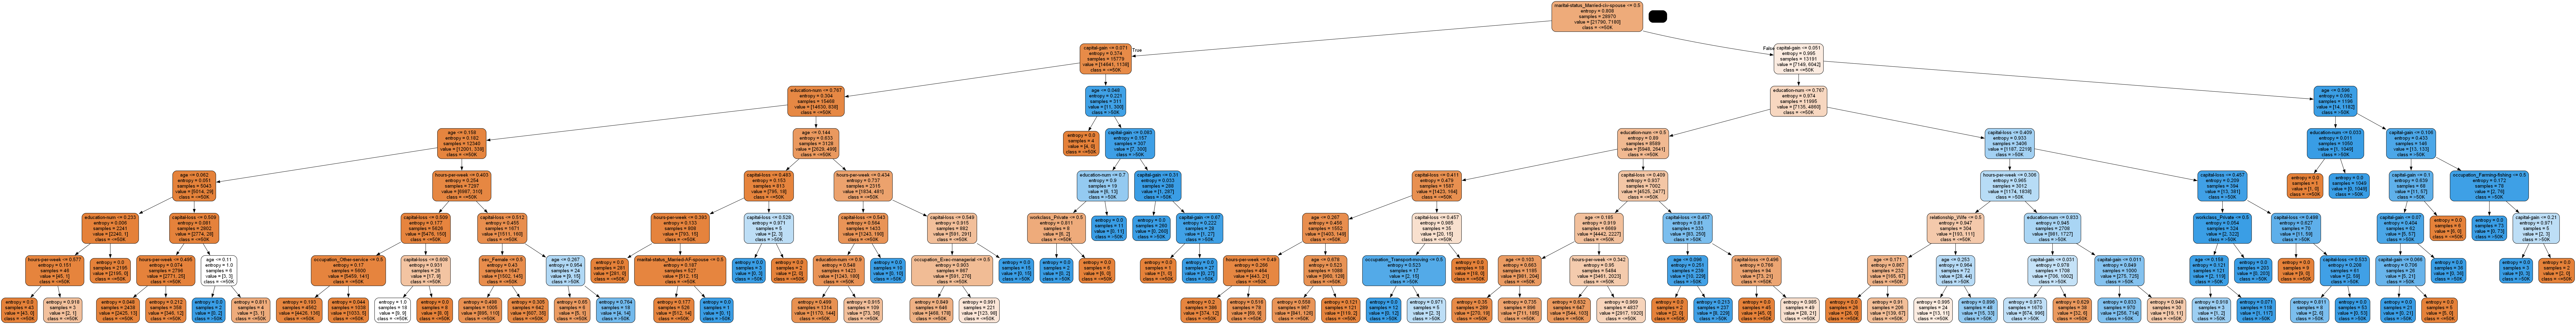

In [58]:
from sklearn.tree import export_graphviz
import graphviz


#印圖時"&"有可能會報錯，改為and
# feature_mapping = {
#     'native-country_Trinadad&Tobago': 'native-country_Trinadad_and_Tobago',
# }

# X_train.rename(columns=feature_mapping, inplace=True)

# dot_data = export_graphviz(clf, out_file=None, label='all', impurity=False, proportion=True, filled=True, rounded=True,  
#                            special_characters=True, feature_names=X_train.columns, class_names=['小於50K', '大於50K'])

# graph = graphviz.Source(dot_data)
# graph

from IPython.display import Image
import pydotplus
dot_data = export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['<=50K', '>50K'],  
                         filled=True, rounded=True,  
                         special_characters=False)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [59]:
# clf.score(X_train, y_train)

In [60]:
# clf.score(X_test,y_test)

性能評估_Accuracy

In [61]:
# 評估模型性能
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'模型準確度: {accuracy:.2f}')

模型準確度: 0.85


績效評估指標

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# 精確度
precision = precision_score(y_test, y_pred)
print(f'精確度: {precision:.2f}')

精確度: 0.79


績效評估指標_招回率

In [63]:
# 召回率
recall = recall_score(y_test, y_pred)
print(f'召回率: {recall:.2f}')

召回率: 0.53


In [64]:
# F1
f1 = f1_score(y_test, y_pred)
print(f'F1分数: {f1:.2f}')

F1分数: 0.64


績效評估指標_混淆矩陣

In [65]:
# 計算混淆矩陣
conf_matrix = confusion_matrix(y_test, y_pred)
print('混淆矩阵:')
print(conf_matrix)
#TP FN
#FN TN

混淆矩阵:
[[11054   517]
 [ 1708  1938]]


Excel

In [66]:

from openpyxl import Workbook
#將測試集的輸出印出array([0, 0, 0, ..., 1, 0, 1], dtype=int64)
result_test = clf.predict(X_test.iloc[:,:])

#產出Excel(Test data)
wb = Workbook()
ws = wb.active
ws.append(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income','Predict result'])

for i in range(len(result_test)):
    if result_test[i] == 0:
        result = '<=50K.'
    else:
        result = '>50K.'
    #將現在loop到原始資料的列轉為list
    li = od.iloc[i,:].tolist()
    #
    li.append(result)
    ws.append(li)
wb.save('adult_id3.xlsx')

資料切分

In [67]:
#批次訓練
train_list=[]
test_list=[]
for i in range(1,21):
    #將資料做Random以及切分資料
    train_data=train_data.sample(frac=1)
    tree = DecisionTreeClassifier(criterion='entropy',max_depth=i)   # criterion可設定為entropy, 決策深度設為 4
    tree.fit(X_train, y_train)
    score_test=tree.score(X_test, y_test)
    score_train=tree.score(X_train, y_train)
    test_list.append(score_test)
    train_list.append(score_train)

result={
    "train":train_list,
    "test":test_list
}
df_result=pd.DataFrame(result)

模型在不同樹深度下的訓練集和測試集的準確度

In [68]:
import matplotlib
matplotlib.use('TKAgg') 
import matplotlib.pyplot as plt


plt.plot(train_list,color=(255/255,100/255,100/255), label="train_accuracy")
plt.plot(test_list,color=(100/255,100/255,255/255), label="test_accuracy")

plt.legend()
plt.ylabel("accuracy")
plt.xlabel("tree_depth")
plt.title("Adult_dataset_accuracy")
plt.xlim([0,21])
plt.grid(True)

plt.show()